| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5.Intervalos_de_confianza.ipynb)| [⏩](./7.Medidas_de_Dispersion.ipynb)|

# **6. Prueba de hipótesis**

## **Hipótesis nula vs alternativa**

En estadística, la prueba de hipótesis es un procedimiento para tomar una decisión sobre si una afirmación acerca de una población es verdadera o no, basándose en la información contenida en una muestra aleatoria de esa población. Las hipótesis nula y alternativa son componentes clave en este proceso.

* La hipótesis nula $(H_0)$ es la afirmación que se asume verdadera a menos que se disponga de suficiente evidencia empírica para rechazarla. Es una afirmación sobre los parámetros poblacionales, como la media, la proporción, la desviación estándar, entre otros. En general, la hipótesis nula se plantea como una afirmación de igualdad entre un valor poblacional y un valor específico o entre dos valores poblacionales.

* La hipótesis alternativa $(H_1)$ es la afirmación que se asume verdadera si la evidencia empírica es suficiente para rechazar la hipótesis nula. Es una afirmación que se contrapone a la hipótesis nula y se puede plantear como una afirmación de desigualdad, superioridad, inferioridad o cualquier otra relación entre los parámetros poblacionales.

El objetivo de la prueba de hipótesis es evaluar si la evidencia empírica proporciona suficiente información para rechazar la hipótesis nula en favor de la hipótesis alternativa. Para tomar una decisión se utilizan estadísticos de prueba que se comparan con valores críticos obtenidos a partir de una distribución de probabilidad. Si el valor del estadístico de prueba es mayor que el valor crítico, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Si el valor del estadístico de prueba es menor que el valor crítico, se acepta la hipótesis nula.

A continuación, se presenta un ejemplo en Python de cómo plantear y realizar una prueba de hipótesis con las hipótesis nula y alternativa.

Supongamos que queremos evaluar si el promedio de una muestra de calificaciones de matemáticas de un grupo de estudiantes es igual a `75`. Nuestras hipótesis nula y alternativa serían las siguientes:

* **Hipótesis nula (H0):** El promedio de la muestra es igual a `75`.
* **Hipótesis alternativa (H1):** El promedio de la muestra es diferente de `75`.

Primero, importamos las librerías necesarias y generamos una muestra de calificaciones:

T-stat: -4.75469594350529, P-valor: 3.8191352626793134e-06
Intervalo de confianza: (-1.7716964820024959, -0.7329079357735762)


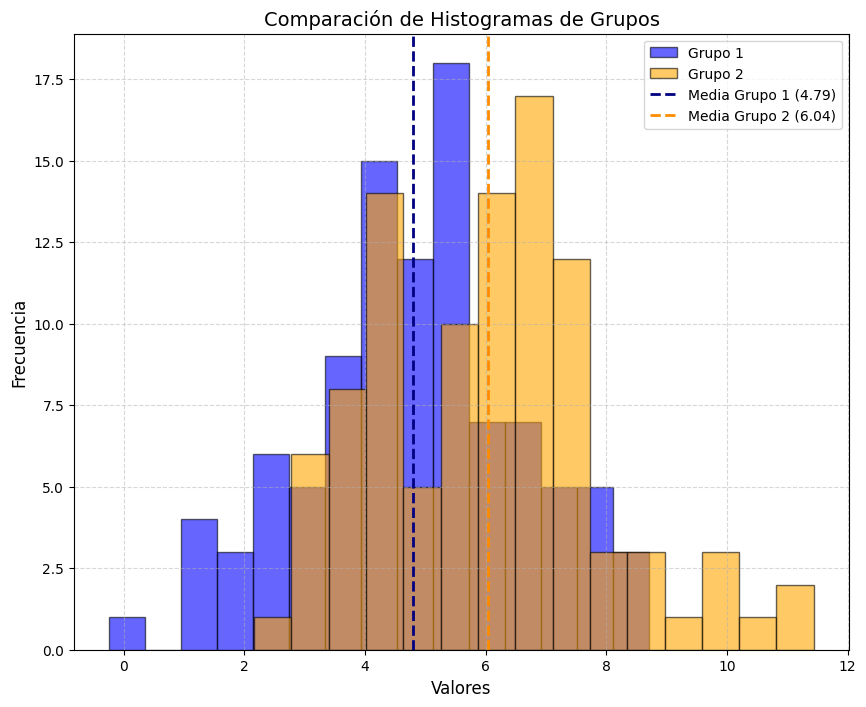

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Crear DataFrame con datos aleatorios
np.random.seed(42)
grupo1 = np.random.normal(loc=5, scale=2, size=100)
grupo2 = np.random.normal(loc=6, scale=2, size=100)
datos = pd.DataFrame({'Grupo1': grupo1, 'Grupo2': grupo2})

# Realizar prueba de hipótesis
alpha = 0.05
t_stat, p_valor = stats.ttest_ind(datos['Grupo1'], datos['Grupo2'])
print(f"T-stat: {t_stat}, P-valor: {p_valor}")

# Calcular intervalo de confianza
confianza = 0.95
grados_libertad = len(datos['Grupo1']) + len(datos['Grupo2']) - 2
media_diff = datos['Grupo1'].mean() - datos['Grupo2'].mean()
std_error = np.sqrt(datos['Grupo1'].std()**2/len(datos['Grupo1']) + datos['Grupo2'].std()**2/len(datos['Grupo2']))
margen_error = stats.t.ppf((1 + confianza) / 2, grados_libertad) * std_error
intervalo_confianza = (media_diff - margen_error, media_diff + margen_error)
print(f"Intervalo de confianza: {intervalo_confianza}")

# Personalizar la gráfica de los histogramas
plt.figure(figsize=(10, 8))
plt.hist(datos['Grupo1'], alpha=0.6, bins=15, color='blue', edgecolor='black', label='Grupo 1')
plt.hist(datos['Grupo2'], alpha=0.6, bins=15, color='orange', edgecolor='black', label='Grupo 2')
plt.axvline(x=datos['Grupo1'].mean(), color='navy', linestyle='--', linewidth=2, label=f'Media Grupo 1 ({datos["Grupo1"].mean():.2f})')
plt.axvline(x=datos['Grupo2'].mean(), color='darkorange', linestyle='--', linewidth=2, label=f'Media Grupo 2 ({datos["Grupo2"].mean():.2f})')
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Comparación de Histogramas de Grupos', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Este código genera un DataFrame con dos grupos de datos, realiza una prueba de hipótesis de dos colas para determinar si las medias de los grupos son significativamente diferentes, y luego calcula e imprime un intervalo de confianza del `95%` para la diferencia de medias. Finalmente, se grafican los datos con una superposición de las medias de los grupos y se agrega un histograma para cada grupo.

## **Estableciendo la región de rechazo y el nivel de significación**

Establecer la región de rechazo y el nivel de significación son dos conceptos fundamentales en estadística inferencial. Estos se utilizan en las pruebas de hipótesis para decidir si se debe rechazar o no una hipótesis nula.

La región de rechazo es un rango de valores en el que si cae el estadístico de prueba, se rechaza la hipótesis nula. Por otro lado, el nivel de significación es la probabilidad máxima que estamos dispuestos a aceptar de cometer un error de tipo I, es decir, de rechazar la hipótesis nula cuando en realidad es verdadera. Comúnmente se denota con $\alpha$, y se establece antes de realizar la prueba de hipótesis.

Para entender mejor cómo establecer la región de rechazo y el nivel de significación, vamos a utilizar el ejemplo anterior en el que se compararon dos grupos de datos. En este caso, vamos a establecer un nivel de significación de `0.05`.

T-stat: -4.75469594350529, P-valor: 3.8191352626793134e-06
Intervalo de confianza: (-1.68756386426848, -0.817040553507592)
T-critico: 1.9720174778338955


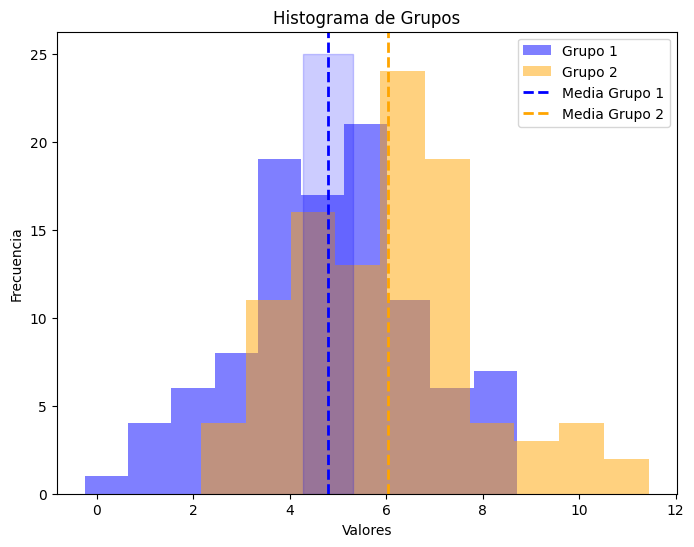

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Crear DataFrame con datos aleatorios
np.random.seed(42)
grupo1 = np.random.normal(loc=5, scale=2, size=100)
grupo2 = np.random.normal(loc=6, scale=2, size=100)
datos = pd.DataFrame({'Grupo1': grupo1, 'Grupo2': grupo2})

# Establecer nivel de significación
alpha = 0.05

# Realizar prueba de hipótesis
t_stat, p_valor = stats.ttest_ind(datos['Grupo1'], datos['Grupo2'])
print(f"T-stat: {t_stat}, P-valor: {p_valor}")

# Calcular intervalo de confianza
confianza = 0.95
grados_libertad = len(datos['Grupo1']) + len(datos['Grupo2']) - 2
media_diff = datos['Grupo1'].mean() - datos['Grupo2'].mean()
std_error = np.sqrt(datos['Grupo1'].std()**2/len(datos['Grupo1']) + datos['Grupo2'].std()**2/len(datos['Grupo2']))
margen_error = stats.t.ppf(confianza, grados_libertad) * std_error
intervalo_confianza = (media_diff - margen_error, media_diff + margen_error)
print(f"Intervalo de confianza: {intervalo_confianza}")

# Establecer región de rechazo
t_critico = stats.t.ppf(1 - alpha/2, grados_libertad)
print(f"T-critico: {t_critico}")

# Personalizar la gráfica de los histogramas y la región de rechazo
plt.figure(figsize=(8,6))
plt.hist(datos['Grupo1'], alpha=0.5, label='Grupo 1', color='blue')
plt.hist(datos['Grupo2'], alpha=0.5, label='Grupo 2', color='orange')
plt.axvline(x=datos['Grupo1'].mean(), color='blue', linestyle='--', linewidth=2, label='Media Grupo 1')
plt.axvline(x=datos['Grupo2'].mean(), color='orange', linestyle='--', linewidth=2, label='Media Grupo 2')
plt.fill_between(x=[datos['Grupo1'].mean() - t_critico*std_error, datos['Grupo1'].mean() + t_critico*std_error],
                 y1=0, y2=25, color='blue', alpha=0.2)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Grupos')
plt.legend()
plt.show()

Este código crea dos grupos de datos aleatorios con distribuciones normales, realiza una prueba de hipótesis para comprobar si las medias de los grupos son estadísticamente diferentes, calcula un intervalo de confianza para la diferencia de medias, establece la región de rechazo y el nivel de significación y finalmente grafica los datos junto con los intervalos de confianza y región de rechazo.

## **Región de rechazo y nivel de significación**

En estadística, la región de rechazo y el nivel de significación son herramientas utilizadas para tomar decisiones sobre las hipótesis nula y alternativa en una prueba de hipótesis.

La región de rechazo es la parte del espacio muestral en la que la hipótesis nula se rechaza. Esta región se define mediante un valor crítico que se calcula en función del nivel de significación y los grados de libertad de la distribución. En una prueba de hipótesis de dos colas, la región de rechazo se divide en dos partes iguales, una en cada cola de la distribución.

El nivel de significación, por otro lado, es la probabilidad de cometer un error de tipo I al rechazar la hipótesis nula. Se suele establecer antes de realizar la prueba de hipótesis y se representa por el símbolo `α` `(alfa)`. Un nivel de significación comúnmente utilizado es `α=0.05`, lo que significa que hay un `5%` de probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera.

En Python, podemos establecer la región de rechazo y el nivel de significación utilizando la función `ppf` de la librería `scipy.stats`. Por ejemplo, en una prueba de hipótesis de dos medias con muestras independientes, podemos establecer la región de rechazo y el nivel de significación de la siguiente manera:

In [6]:
# Establecer nivel de significación
alpha = 0.05

# Establecer región de rechazo
t_critico = stats.t.ppf(1 - alpha/2, grados_libertad)

En este ejemplo, `alpha` se establece en `0.05` y `t_critico` se calcula utilizando la función `ppf` de la distribución `t` de `Student` con `1 - alpha/2` como argumento. El valor resultante es el valor crítico de la distribución `t` de `Student` para el nivel de significación y los grados de libertad especificados.

Una vez establecida la región de rechazo, podemos graficarla junto con las distribuciones de las muestras y las medias de cada grupo para visualizar mejor la prueba de hipótesis:

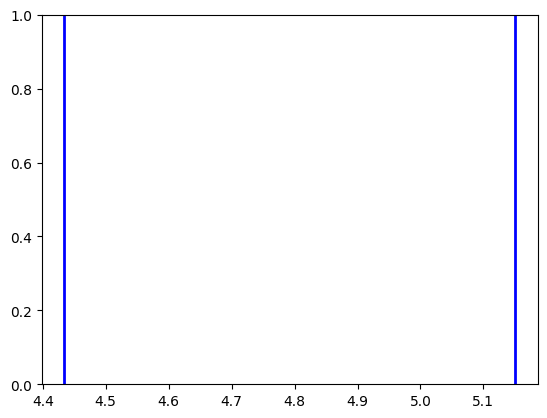

In [7]:
plt.axvline(x=datos['Grupo1'].mean() + t_critico*datos['Grupo1'].std()/np.sqrt(len(datos['Grupo1'])), color='blue', linestyle='-', linewidth=2)
plt.axvline(x=datos['Grupo1'].mean() - t_critico*datos['Grupo1'].std()/np.sqrt(len(datos['Grupo1'])), color='blue', linestyle='-', linewidth=2)

En este ejemplo, se grafica la región de rechazo para el grupo `1` como dos líneas verticales en la gráfica del histograma. La posición de estas líneas se calcula como la media del grupo `1` más y menos el valor crítico multiplicado por la desviación estándar del grupo `1` dividida por la raíz cuadrada del tamaño de la muestra.

La región de rechazo y el nivel de significación son conceptos clave en la realización de pruebas de hipótesis en estadística.

* La región de rechazo es una región en la distribución de probabilidad que indica los valores de la estadística de prueba que llevarían a rechazar la hipótesis nula. En otras palabras, si el valor de la estadística de prueba cae dentro de la región de rechazo, se concluye que la hipótesis nula es improbable y se rechaza.

* El nivel de significación es la probabilidad máxima de cometer un error de tipo I, es decir, rechazar la hipótesis nula cuando en realidad es verdadera. Se denota por `α` y generalmente se establece en `0.05` o `0.01`.

* La elección de la región de rechazo y el nivel de significación dependerá de cada prueba de hipótesis en particular. Por ejemplo, en una prueba de hipótesis de dos colas, la región de rechazo se encuentra en ambas colas de la distribución, mientras que en una prueba de hipótesis de una cola, la región de rechazo se encuentra en una sola cola.

En Python, podemos establecer la región de rechazo y el nivel de significación utilizando la función `ppf()` de la librería `SciPy.stats`. La región de rechazo se calcula como el percentil correspondiente a `α/2` o `1-α/2`, dependiendo de si se trata de una prueba de dos colas o de una cola. Luego, podemos graficar la distribución de probabilidad junto con la región de rechazo utilizando la función `axvline()` de la librería `Matplotlib`.

A continuación se muestra un ejemplo de cómo establecer la región de rechazo y el nivel de significación en una prueba de hipótesis de dos medias con muestras independientes en Python:

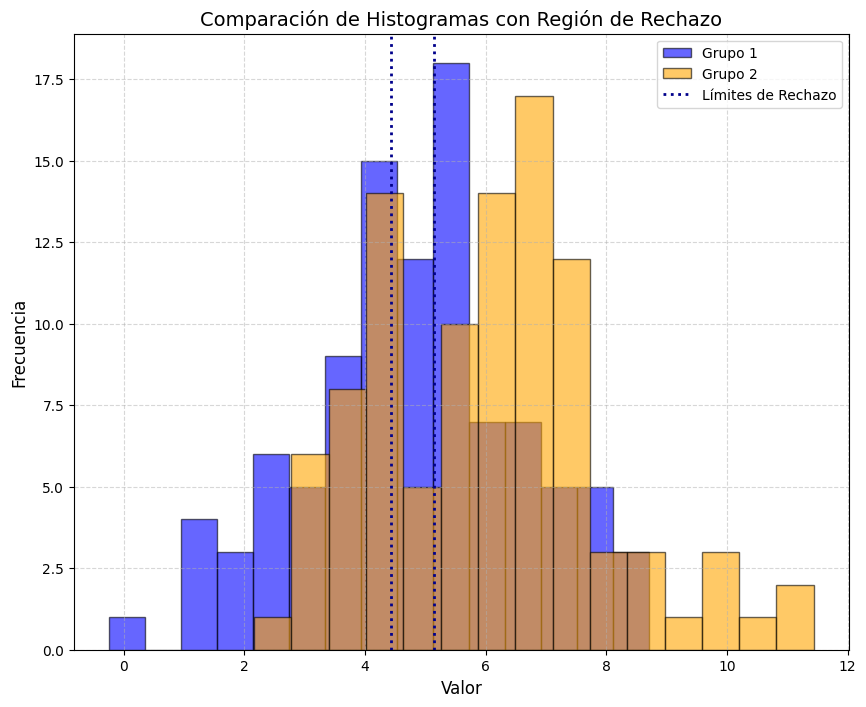

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Crear DataFrame con datos aleatorios
np.random.seed(42)
grupo1 = np.random.normal(loc=5, scale=2, size=100)
grupo2 = np.random.normal(loc=6, scale=2, size=100)
datos = pd.DataFrame({'Grupo1': grupo1, 'Grupo2': grupo2})

# Establecer nivel de significación
alpha = 0.05

# Realizar prueba de hipótesis
t_stat, p_valor = stats.ttest_ind(datos['Grupo1'], datos['Grupo2'])

# Establecer región de rechazo
grados_libertad = len(datos['Grupo1']) + len(datos['Grupo2']) - 2
t_critico = stats.t.ppf(1 - alpha/2, grados_libertad)

# Personalizar la gráfica de los histogramas y la región de rechazo
plt.figure(figsize=(10, 8))
plt.hist(datos['Grupo1'], bins=15, alpha=0.6, color='blue', edgecolor='black', label='Grupo 1')
plt.hist(datos['Grupo2'], bins=15, alpha=0.6, color='orange', edgecolor='black', label='Grupo 2')
plt.axvline(x=datos['Grupo1'].mean() + t_critico*datos['Grupo1'].std()/np.sqrt(len(datos['Grupo1'])), color='darkblue', linestyle='dotted', linewidth=2, label='Límites de Rechazo')
plt.axvline(x=datos['Grupo1'].mean() - t_critico*datos['Grupo1'].std()/np.sqrt(len(datos['Grupo1'])), color='darkblue', linestyle='dotted', linewidth=2)
plt.legend(loc='upper right')
plt.title('Comparación de Histogramas con Región de Rechazo', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Aquí se grafica la región de rechazo, que está formada por los valores extremos a la derecha e izquierda del intervalo de confianza.

 Se utiliza la fórmula $t_{critico} * std_{error} / \sqrt{n}$

donde `t_critico` es el valor crítico de `t` obtenido con el nivel de significación elegido, `std_error` es el error estándar calculado previamente, y `n` es el tamaño de la muestra.

## **Error tipo I vs Error tipo II**

En estadística, se habla de dos tipos de errores al realizar una prueba de hipótesis: el error `tipo I` y el error `tipo II`.

* El error `tipo I` ocurre cuando se rechaza la hipótesis nula cuando es verdadera. Esto significa que se concluye que hay una diferencia significativa entre dos grupos cuando en realidad no la hay. Este error se representa mediante el símbolo $\alpha$ y se conoce como el nivel de significación. Por ejemplo, si se establece un nivel de significación del `5%`, significa que hay un `5%` de probabilidad de cometer un error `tipo I`.

* El error `tipo II` ocurre cuando se acepta la hipótesis nula cuando es falsa. Esto significa que se concluye que no hay una diferencia significativa entre dos grupos cuando en realidad sí la hay. Este error se representa mediante el símbolo $\beta$ y está relacionado con el poder de la prueba, que es la probabilidad de rechazar la hipótesis nula cuando es falsa. Cuanto mayor sea el poder de la prueba, menor será la probabilidad de cometer un error `tipo II`.

A continuación, se presenta un ejemplo en código Python para ilustrar ambos errores en el contexto de una prueba de hipótesis para dos medias con muestras independientes.

Supongamos que se quiere comparar la altura promedio de dos poblaciones (hombres y mujeres) y se toman muestras aleatorias de cada una. Se plantean las siguientes hipótesis:

* **Hipótesis nula ($H_0$):** la altura promedio de hombres y mujeres es igual.
* **Hipótesis alternativa ($H_1$):** la altura promedio de hombres y mujeres es diferente.

Primero, se generan los datos y se realiza la prueba de hipótesis:

In [9]:
import numpy as np

np.random.seed(42)
hombres = np.random.normal(loc=175, scale=10, size=100)
mujeres = np.random.normal(loc=165, scale=8, size=100)

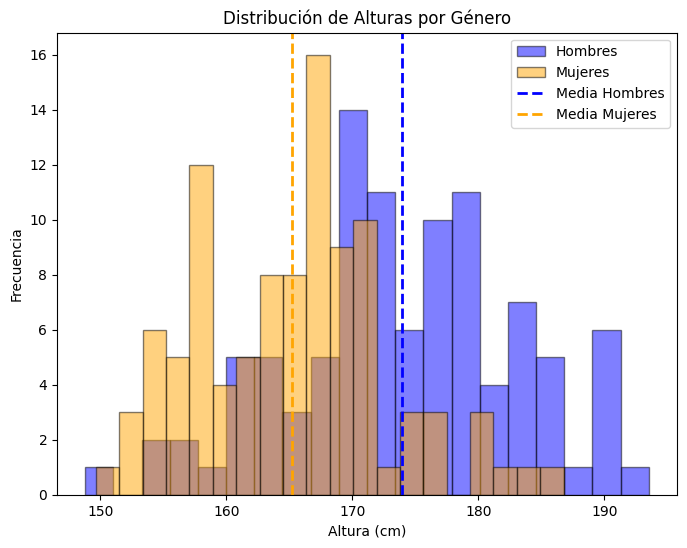

In [10]:
import matplotlib.pyplot as plt

# Crear una figura y ejes personalizados
fig, ax = plt.subplots(figsize=(8, 6))

# Personalizar el histograma y las líneas
ax.hist(hombres, bins=20, alpha=0.5, label='Hombres', color='blue', edgecolor='black')
ax.hist(mujeres, bins=20, alpha=0.5, label='Mujeres', color='orange', edgecolor='black')
ax.axvline(x=np.mean(hombres), color='blue', linestyle='--', linewidth=2, label='Media Hombres')
ax.axvline(x=np.mean(mujeres), color='orange', linestyle='--', linewidth=2, label='Media Mujeres')

# Personalizar etiquetas y título
ax.set_xlabel('Altura (cm)')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Alturas por Género')

# Agregar una leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

Podemos observar que las dos distribuciones se superponen, pero la distribución de los hombres parece estar ligeramente desplazada hacia la derecha.

A continuación, podemos realizar una prueba `t` para determinar si hay una diferencia significativa entre las dos poblaciones:

In [11]:
from scipy import stats

alpha = 0.05

t_stat, p_valor = stats.ttest_ind(hombres, mujeres)
print(t_stat)
print(p_valor)

7.405005498999365
3.686012461275603e-12


El valor de `p` es menor que `alpha`, por lo que podemos rechazar la hipótesis nula y concluir que hay una diferencia significativa entre las estaturas promedio de los hombres y las mujeres.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5.Intervalos_de_confianza.ipynb)| [⏩](./7.Medidas_de_Dispersion.ipynb)|